<a href="https://colab.research.google.com/github/avinashganguri/Python-ICP6/blob/master/CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('drive/My Drive/Colab Notebooks/iris/Python_Lesson6/CC.csv', index_col=0)

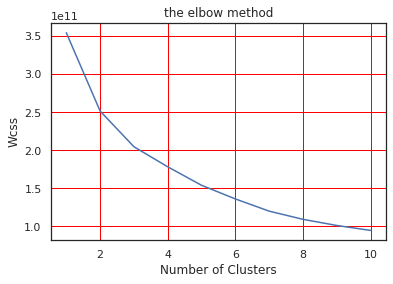

In [17]:

dataset.isna().sum()
dataset.fillna(dataset.mean(),inplace=True)
dataset.isna().sum()

X = dataset.iloc[:,1:]
Y = dataset.iloc[:,-1]

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.grid(b=True, which='major', color='RED', linestyle='-')
plt.show()

In [36]:

##building the model
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.46405331813103895


In [0]:
scaler =preprocessing.StandardScaler() 
scaler.fit(X)
X_scaled_array=scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array, columns =X.columns) 

In [32]:
nclusters=3# this is the k in kmeans
seed =0
km =KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled) # predict the cluster for each data point
y_cluster_kmeans=km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)


0.19848932710754305


In [0]:
pca= PCA(2)s
X_pca= pca.fit_transform(X_scaled)

In [37]:
nclusters=3# this is the k in kmeans
seed =0
km =KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_pca) # predict the cluster for each data point
y_cluster_kmeans=km.predict(X_pca)
score = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print(score)

0.4363878107304869
